In [4]:
import numpy as np
import pandas as pd
import re
import json

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers import Concatenate

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

from numpy import array
from numpy import asarray
from numpy import zeros

In [ ]:
"""
Code is currently set up to produce a model/results for the usefulness of reviews. This same code
was used to create the model and results for all of the attributes in part 1, but with adjustments
of parameters to make it model and dataset specific.
"""

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Colab Datasets/arizona_user_review_useful.csv")
#df = df[df["review_count"] > 2000]

In [7]:
df

,Unnamed: 0,user_id,name,review_count,yelping_since,useful_x,funny_x,cool_x,elite,friends,...,compliment_photos,StarsBucket,review_id,business_id,stars,useful_y,funny_y,cool_y,text,date
0,0,--4ZhTMV2fIlGhcUk8S5rQ,Belinda,3.0,2012-06-10 21:03:30,4.0,0.0,0.0,NaN,"7M78bwoPeTxHPO8jPCEydg, QfaJ-YKSrcPCYgHVIYu1UQ...",...,0.0,4.0,igGTKcBM09HzZjvRS0Dm5Q,JHxfEDW05_KSTfk-SLqXGw,3.0,1,0,0,I LOVE Indian food!!! I was so excited when th...,2018-01-25 19:11:04
1,1,--4ZhTMV2fIlGhcUk8S5rQ,Belinda,3.0,2012-06-10 21:03:30,4.0,0.0,0.0,NaN,"7M78bwoPeTxHPO8jPCEydg, QfaJ-YKSrcPCYgHVIYu1UQ...",...,0.0,4.0,0K7Hl3fBGe8iwZSIDfMg9Q,7znuVDPDpjh4nkJ_xxb-5Q,4.0,3,0,0,This was a GREAT way to spend a Sat afternoon!...,2015-03-08 02:14:04
2,2,--5t79VnMbzUeoaOmpMoOg,Alfonso,8.0,2016-01-25 21:20:49,3.0,1.0,0.0,NaN,NaN,...,0.0,3.0,GCkdtIIAM9s5PwC7a4pPAA,o6hWaMjS7-CdXq3WzW9d8w,5.0,0,0,0,"The guys at Best Mattress are simply, the best...",2020-09-06 19:00:23
3,3,--5t79VnMbzUeoaOmpMoOg,Alfonso,8.0,2016-01-25 21:20:49,3.0,1.0,0.0,NaN,NaN,...,0.0,3.0,CTZHjzQXXOwS-kfRVZ0GqA,tZR09XLQ2tjOgXhSoxILXA,2.0,1,0,0,"Yesterday, December 22nd we ordered take out v...",2020-12-23 19:08:02
4,4,--5t79VnMbzUeoaOmpMoOg,Alfonso,8.0,2016-01-25 21:20:49,3.0,1.0,0.0,NaN,NaN,...,0.0,3.0,i9ZMJp3unUSN_GNWS0bajw,jZ1rUspubgkuZjwKJMhEEw,5.0,0,0,0,This place is awesome. Just the best for pizza...,2018-08-12 20:59:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419120,419120,zzsoQwLw7kQcMq73JKZNAQ,C,1.0,2015-03-14 23:46:43,0.0,0.0,0.0,NaN,NaN,...,0.0,1.0,JcXDwEgbircPTbO3eryJrQ,SLreQZjicOqB_7MCfJ8MdQ,1.0,0,0,0,Don't go if you are in a hurry or if you want ...,2015-04-26 00:19:50
419121,419121,zzy6clesq9K8AGo74trKAA,Jason,21.0,2014-04-13 04:52:56,88.0,4.0,10.0,NaN,NaN,...,0.0,3.0,drdlQat92sT126wQgwu2fw,vvdkZS2-bCRNQ2Lcl8kxsA,1.0,8,1,1,The apartment itself was very nice. The qualit...,2015-05-20 00:40:50
419122,419122,zzy6clesq9K8AGo74trKAA,Jason,21.0,2014-04-13 04:52:56,88.0,4.0,10.0,NaN,NaN,...,0.0,3.0,NmFRUKAUR26-u0I4dU5z1w,o_Ss6BJQiB83PLICHg1Ccw,5.0,0,0,0,I can't review the purchase process like the o...,2014-05-04 03:03:46
419123,419123,zzy6clesq9K8AGo74trKAA,Jason,21.0,2014-04-13 04:52:56,88.0,4.0,10.0,NaN,NaN,...,0.0,3.0,PYvwKEG7MkndgAEJVLtrew,gya8QCLpcMuTA326zML9aw,5.0,5,0,4,These guys were flat out awesome. I've moved t...,2015-02-24 14:05:47


In [ ]:
def preprocess_text(sen):
    sentence = re.sub('[^a-zA-Z]', ' ', sen)
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [ ]:
X = []
sentences = list(df["text"])
for sen in sentences:
    X.append(preprocess_text(sen))

one_hot_encoded = pd.get_dummies(df["StarsBucket"], prefix='Stars')
y = one_hot_encoded
# y.insert(0, "Stars_1.0", False)
# y.insert(0, "Stars_2.0", False)

In [ ]:
X = []
sentences = list(df["text"])
for sen in sentences:
    X.append(preprocess_text(sen))

y = df.BikeParking

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
tf.shape(y_train)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([641,   5], dtype=int32)>

In [ ]:
y_train

,Stars_2.0,Stars_1.0,Stars_3.0,Stars_4.0,Stars_5.0
201398,False,False,False,True,False
230284,False,False,False,True,False
201408,False,False,False,True,False
263364,False,False,False,True,False
138899,False,False,False,True,False
...,...,...,...,...,...
40625,False,False,False,True,False
40660,False,False,False,True,False
103994,False,False,False,True,False
201401,False,False,False,True,False


In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
embeddings_dictionary = dict()

glove_file = open('/content/drive/My Drive/Colab Datasets/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(5, activation='sigmoid')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
print(model.summary())

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 200)]             0         
                                                                 
 embedding_10 (Embedding)    (None, 200, 100)          8736300   
                                                                 
 lstm_10 (LSTM)              (None, 128)               117248    
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 8853677 (33.77 MB)
Trainable params: 117377 (458.50 KB)
Non-trainable params: 8736300 (33.33 MB)
_________________________________________________________________
None


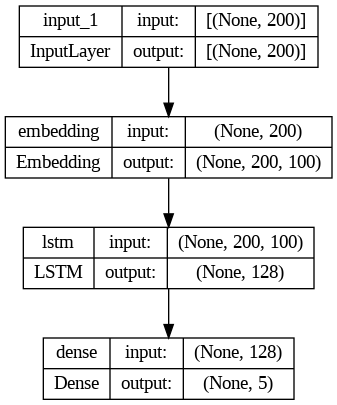

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=1, verbose=1, validation_split=0.2)

1592/1592 [==============================] - 15s 10ms/step - loss: 0.3167 - acc: 0.8969 - val_loss: 0.3112 - val_acc: 0.8991


In [ ]:
print(history)

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

1989/1989 [==============================] - 9s 4ms/step - loss: 0.3165 - acc: 0.8973
Test Score: 0.3164728879928589
Test Accuracy: 0.8973005414009094


1989/1989 [==============================] - 8s 4ms/step
1393      True
229978    True
117198    True
206419    True
216158    True
          ... 
183017    True
159911    True
182083    True
89676     True
51825     True
Name: BikeParking, Length: 63642, dtype: bool


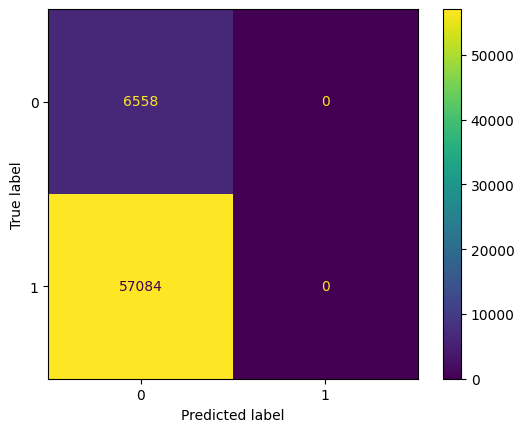

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import tensorflow as tf

pred = model.predict(X_test)
y_test = np.argmax(y_test, axis=1) if len(y_test.shape) > 1 else y_test
print(y_test)
pred = tf.argmax(pred, axis=1)
cm = confusion_matrix(y_test, pred)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_disp.plot()
plt.show()

In [ ]:
y_test

array([2, 3, 3, ..., 3, 3, 3])

In [ ]:
y_train

,Stars_1.0,Stars_2.0,Stars_3.0,Stars_4.0,Stars_5.0
358046,False,False,False,True,False
48919,False,False,False,True,False
158324,False,False,False,True,False
234739,False,False,False,True,False
414403,False,False,False,True,False
...,...,...,...,...,...
314370,False,False,False,True,False
133717,False,False,False,True,False
20745,False,False,False,True,False
414536,False,False,False,True,False
